In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import joblib

%matplotlib inline

In [2]:
X = pd.read_csv("data-preNOx-train.csv")

In [3]:
y = X["NOx(GT)"]
X.drop(["NOx(GT)"], axis=1, inplace=True)

In [4]:
poly = PolynomialFeatures(degree=2)
poly_X = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.2, random_state=42, shuffle=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5428, 91), (1357, 91), (5428,), (1357,))

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, y_train, epochs=300, batch_size=64, validation_data=(X_test, y_test), callbacks=early_stopping)

Epoch 1/300


C:\Users\learn\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 101642.9375 - mean_absolute_error: 232.2164 - val_loss: 28511.0215 - val_mean_absolute_error: 137.7541
Epoch 2/300
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25165.5742 - mean_absolute_error: 123.4547 - val_loss: 12718.9062 - val_mean_absolute_error: 76.7909
Epoch 3/300
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10363.4932 - mean_absolute_error: 68.3241 - val_loss: 8150.6367 - val_mean_absolute_error: 58.4967
Epoch 4/300
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7814.2827 - mean_absolute_error: 57.0860 - val_loss: 7222.4751 - val_mean_absolute_error: 54.8194
Epoch 5/300
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7240.4688 - mean_absolute_error: 54.7058 - val_loss: 6683.7192 - val_mean_absolute_error: 52.9045
Epoch 6/300
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6487.4814 - mean_absolute_error: 52.1058 - val_loss: 6213.0605 - val_mean_absolute_error: 50.5546
Epoch 7/300
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 55

In [7]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

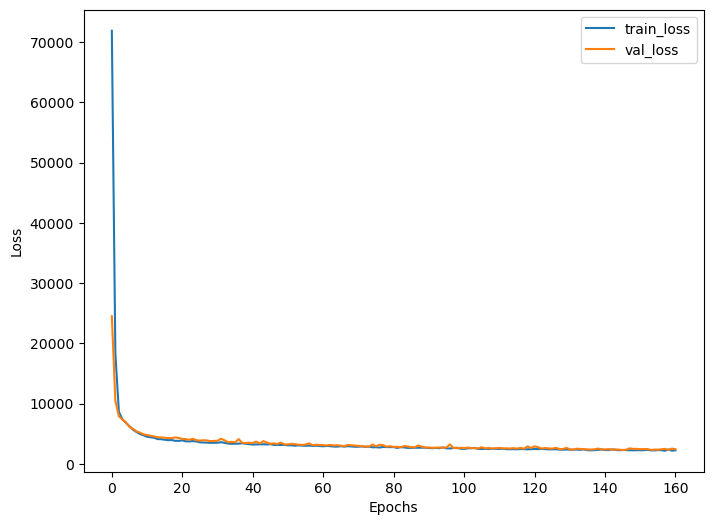

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


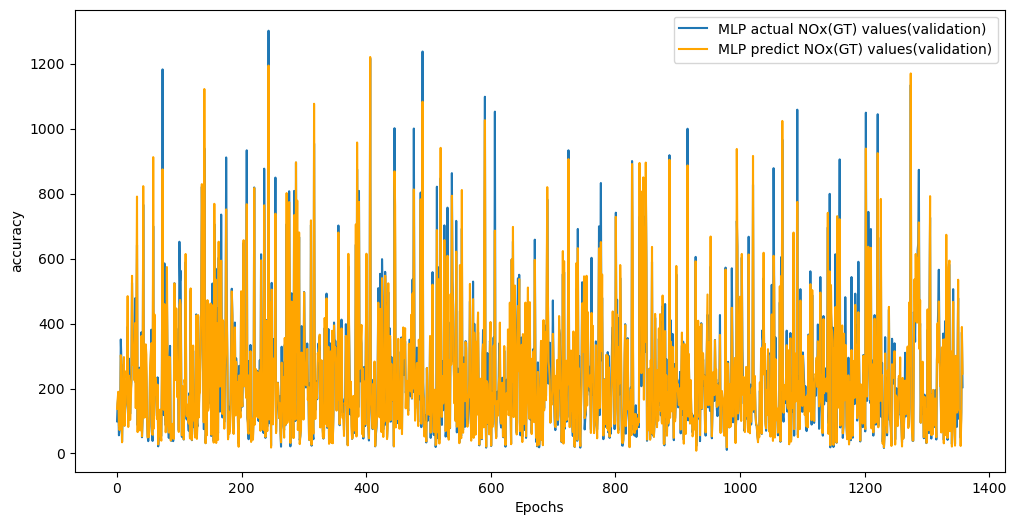

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, len(y_test), len(y_test)), y_test.values, label="MLP actual NOx(GT) values(validation)")
plt.plot(np.linspace(0, len(y_test), len(y_test)), model.predict(X_test), color="orange", label="MLP predict NOx(GT) values(validation)")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [27]:
RMSE = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
MAE = mean_absolute_error(y_test, model.predict(X_test))
RMSE, MAE, len(y_test)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step


(47.75990753116891, 29.60653600502998, 1357)

In [28]:
model.save("regression_model.h5")
# model_para_yaml = model.to_yaml()
# with open("model_para.yaml", 'w') as f:
#     f.write(model_para_yaml)
# model.save_weights("model_weights.h5")


##### 经过对比发现，通过多项式变换创造了新的特征后，可以让模型更好的学习到数据之间的关系，有效的降低损失值

In [29]:
from tensorflow.keras.models import load_model

model_load = load_model("regression_model.h5")
model_load.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │        11,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,659 (88.52 KB)

 Trainable params: 22,657 (88.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [56]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor


def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(64, input_shape=(poly_X.shape[1],), activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(16, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

model = KerasRegressor(build_fn=create_model, optimizer='adam', activation='relu', epochs=50, batch_size=32, verbose=0)

para_dict = {
    # "optimizer" : ['adam', 'rmsprop'],
    "activation" : ["relu", "tanh"],
    "epochs" : [150]
}

grid = GridSearchCV(estimator=model, param_grid=para_dict, n_jobs=-1, cv=5)


In [57]:
gird_res = grid.fit(poly_X, y)
gird_res.best_params_

C:\Users\learn\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\learn\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


{'activation': 'relu', 'epochs': 150}

In [58]:
joblib.dump(gird_res.best_estimator_, "best_model.pkl")
with open("build_fn.pkl", "wb") as f:
    joblib.dump(create_model, f)

In [59]:
with open("build_fn.pkl", "rb") as f:
    build_fn = joblib.load(f)
best_model = joblib.load('best_model.pkl')

In [60]:
best_model.model = build_fn

In [61]:
mean_absolute_error(best_model.predict(X_test), y_test)

34.24397217320483